Problem Statement:

We are given the Census Income dataset from the 1994 US Census.The goal is to predict wether a person earns <50K or >50K annually based on demographic and work related features.

Importing the Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Load the data

In [4]:
df=pd.read_csv("D:/datasets/census-income.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
df.head(5000)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


Exploratory Data Analysis

In [21]:
df.tail(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [32]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income']
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [34]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [35]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [40]:
for i in df.columns:
    print(i,"\n",df[i].value_counts()[:10])

age 
 age
36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
Name: count, dtype: int64
workclass 
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
fnlwgt 
 fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
113364    12
126675    12
111483    11
120277    11
123983    11
Name: count, dtype: int64
education 
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
Name: count, dtype: int64
education-num 
 education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15  

In [38]:
for i in df.columns:
    print(i,'\n',df[i].unique()[:10])

age 
 [39 50 38 53 28 37 49 52 31 42]
workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt 
 [ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449]
education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate']
education-num 
 [13  9  7 14  5 10 12 11  4 16]
marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct']
relationship 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex 
 [' Male' ' Female']
capital-gain 
 [ 2174   

In [36]:
(df=='?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [52]:
df.replace("?",np.nan,inplace=True)

In [53]:
(df=="?").sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [44]:
'''
Data cleaning:
1) Check for Null Values

2)Check for duplicate Values

3) Check for Outliers
'''

'\nData cleaning:\n1) Check for Null Values\n\n2)Check for duplicate Values\n\n3) Check for Outliers\n'

In [45]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [46]:
df.isnull().sum().sum()

4262

In [48]:
4262/32651*100

13.053198983185812

In [54]:
df.dropna(inplace=True)

In [56]:
df.isnull().sum().sum()

0

In [58]:
df.duplicated().sum()

23

In [59]:
df.drop_duplicates(inplace=True)

In [64]:
df.duplicated().sum()

0

check for outliers

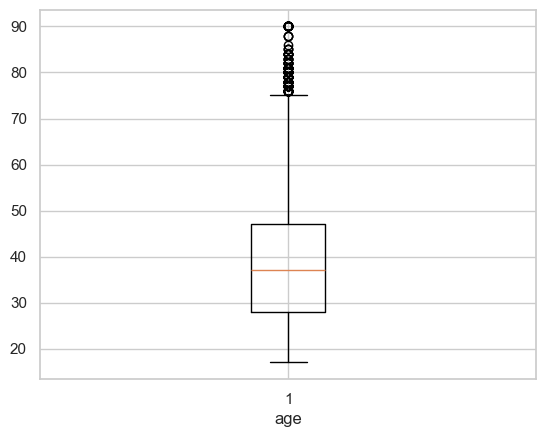

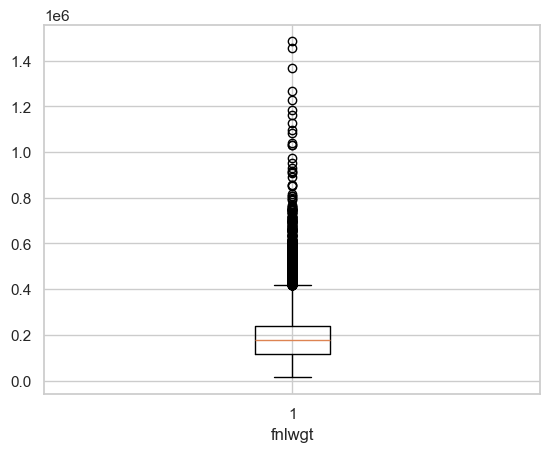

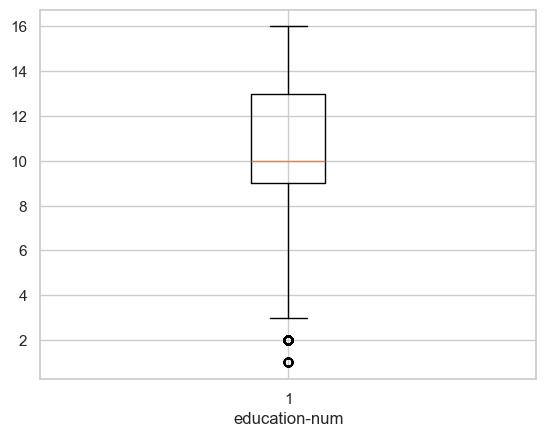

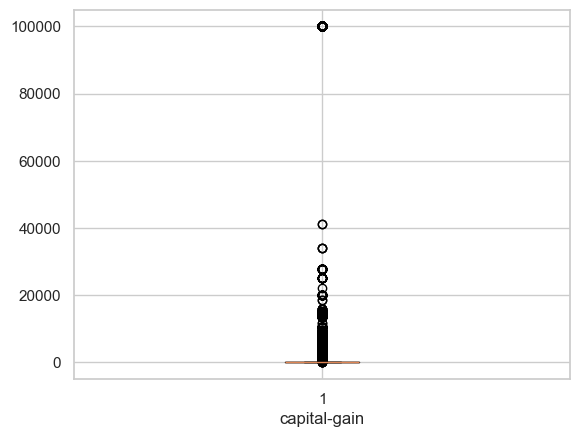

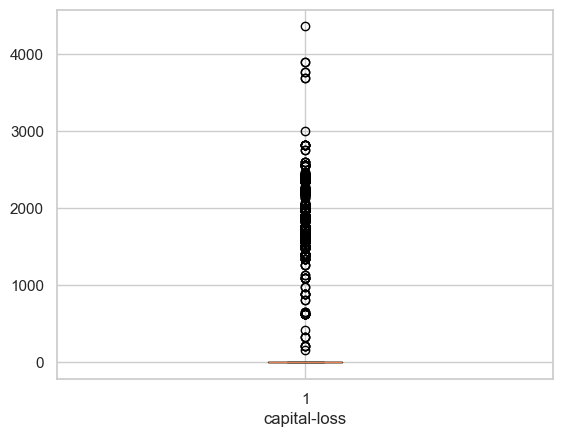

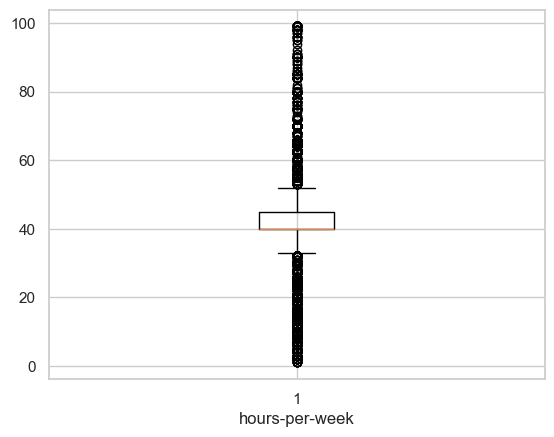

In [65]:
for i in df.columns:
    if(df[i].dtypes!="object"):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

VISUALISATIONS

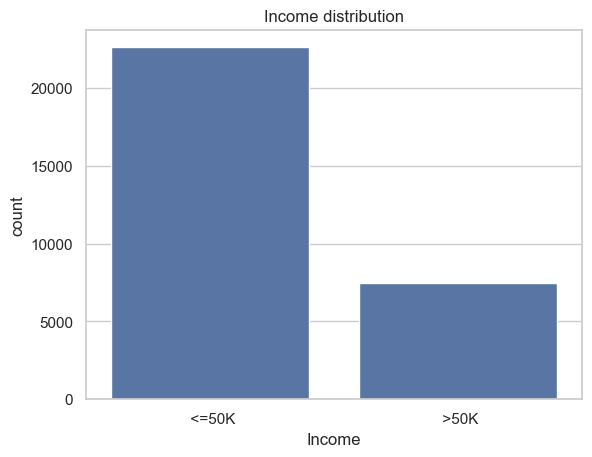

In [71]:
sns.countplot(x=df["Income"])
plt.title("Income distribution")
plt.show()

Insight

there more individuals who earn <=50k than the insividuals who earn >50k

this show the dataset is imblance

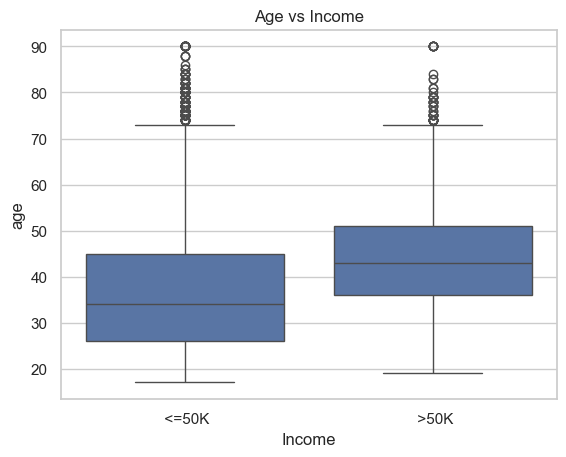

In [78]:
sns.boxplot(x=df["Income"],y=df["age"])
plt.title("Age vs Income")
plt.show()

Insights:
People earning >50K are generally older.

This suggest that work experience is a major factor influencing income.

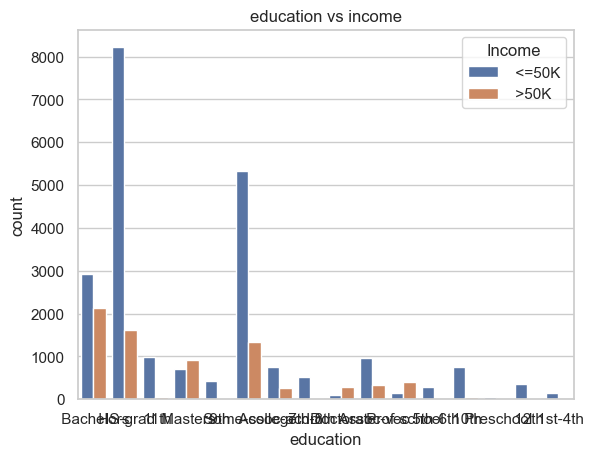

In [83]:
sns.countplot(x=df["education"],hue=df["Income"])
plt.title("education vs income")
plt.show()

Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [87]:
col_list=df.select_dtypes(include="object")
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [88]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
5,20,2,16567,12,13,2,3,5,4,0,0,0,39,38,0
6,32,2,7982,6,4,3,7,1,2,0,0,0,15,22,0
7,35,4,12746,11,8,2,3,0,4,1,0,0,44,38,1
8,14,2,1225,12,13,4,9,1,4,0,104,0,49,38,1
9,25,2,7908,9,12,2,3,0,4,1,78,0,39,38,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int32
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int32
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int32
 6   occupation      30139 non-null  int32
 7   relationship    30139 non-null  int32
 8   race            30139 non-null  int32
 9   sex             30139 non-null  int32
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int32
 14  Income          30139 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


model building

In [92]:
x=df.drop("Income",axis=1)
y=df["Income"]

In [91]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,15471,7,11,2,12,5,4,0,0,0,37,38
32557,23,2,7555,11,8,2,6,0,4,1,0,0,39,38
32558,41,2,7377,11,8,6,0,4,4,0,0,0,39,38
32559,5,2,12060,11,8,4,0,3,4,1,0,0,19,38


In [93]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 30139, dtype: int32

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [96]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
2489,37,2,14694,15,9,0,11,4,4,0,0,0,47,38
4887,16,0,7913,7,11,4,0,4,2,0,0,0,39,38
5969,15,2,8170,11,8,4,6,2,2,1,0,0,39,38
29494,22,5,6753,8,10,4,3,4,4,0,0,0,49,38
30392,2,5,15646,15,9,4,9,3,4,1,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32194,25,5,19774,11,8,4,0,4,2,0,0,0,39,38
5877,20,2,17741,3,1,2,4,0,4,1,0,0,80,25
935,20,2,9525,11,8,2,2,0,4,1,0,0,93,38
17063,32,2,5556,11,8,2,2,0,4,1,0,0,39,38


In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
sm=SMOTE(random_state=42)
x_train_bal,y_train_bal=sm.fit_resample(x_train,y_train)

In [99]:
sm

SMOTE(random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr=LogisticRegression()

In [102]:
lr.fit(x_train_bal,y_train_bal)

C:\Users\prajw\anaconda3\okokok\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred=lr.predict(x_test)

In [104]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [106]:
from sklearn.metrics import*

In [120]:
lr_acc=accuracy_score(y_test,y_pred)

In [121]:
lr_acc

0.7513271400132714

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [130]:
dt=DecisionTreeClassifier(max_depth=8,random_state=12)
dt

DecisionTreeClassifier(max_depth=8, random_state=12)

In [131]:
dt.fit(x_train_bal,y_train_bal)

DecisionTreeClassifier(max_depth=8, random_state=12)

In [133]:
dt_pred=dt.predict(x_test)

In [134]:
dt_acc=accuracy_score(y_test,dt_pred)

In [135]:
dt_acc

0.829628400796284

In [136]:
rf=RandomForestClassifier()

In [139]:
rf.fit(x_train_bal,y_train_bal)

RandomForestClassifier()

In [141]:
rf_pred=rf.predict(x_test)

In [142]:
rf_acc=accuracy_score(y_test,rf_pred)

In [143]:
rf_acc

0.8482083609820836

Accuracy Comaprision

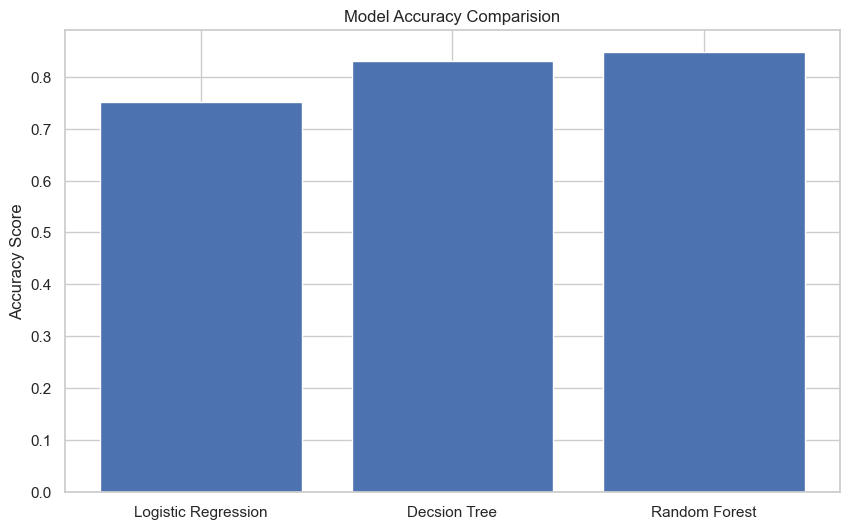

In [145]:
model_names=['Logistic Regression','Decsion Tree','Random Forest']
accuracy_scores=[lr_acc,dt_acc,rf_acc]

plt.figure(figsize=(10,6))
plt.bar(model_names,accuracy_scores)
plt.title('Model Accuracy Comparision')
plt.ylabel('Accuracy Score')
plt.show()